In [8]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout , Activation , Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard , ModelCheckpoint
%run DataUtilsModule.ipynb

<h2>Already Save The Data No Need To Call The Cell Again</h2>

In [42]:
# utl = utils()

# X_train,X_test,Y_train,Y_test,X_dev,Y_dev  = utl.load_data(5 ,img_size=100 , batch_size=200) 
# #totalClasses,img_size=50,data_path='../data/input' , batch_size=False, #trainPer=80
# X_train = utl.convert2RGB(X_train)
# X_test = utl.convert2RGB(X_test)
# X_dev = utl.convert2RGB(X_dev)

In [43]:
# print(X_train.shape)
# print(Y_train.shape)

# print(X_test.shape)
# print(Y_test.shape)

# print(X_dev.shape)
# print(Y_dev.shape)

(800, 100, 100, 3)
(800,)
(100, 100, 100, 3)
(100,)
(100, 100, 100, 3)
(100,)


In [44]:
# utl.save_data('retrivedX_TestData' , X_test)
# utl.save_data('retrivedX_TrainData' , X_train)
# utl.save_data('retrivedY_TestData' , Y_test)
# utl.save_data('retrivedY_TrainData' , Y_train)
# utl.save_data('retrivedX_DevData' , X_dev)
# utl.save_data('retrivedY_DevData' , Y_dev)

<h2>Loading Saved Data</h2>

In [45]:
utl = utils()

X_test = utl.load_saved_data('retrivedX_TestData')/255
X_train = utl.load_saved_data('retrivedX_TrainData')/255
Y_test = utl.load_saved_data('retrivedY_TestData')
Y_train = utl.load_saved_data('retrivedY_TrainData')
X_dev = utl.load_saved_data('retrivedX_DevData')/255
Y_dev = utl.load_saved_data('retrivedY_DevData')


print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

print(X_dev.shape)
print(Y_dev.shape)

(800, 100, 100, 3)
(800,)
(100, 100, 100, 3)
(100,)
(100, 100, 100, 3)
(100,)


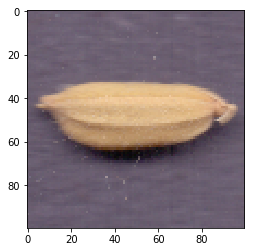

In [46]:
plt.imshow(X_train[0])

<h2>Quick and Rough Model</h2>

In [47]:
#Create A Model

model = Sequential([
    #Layer 1                    
    Conv2D(filters=8 , kernel_size=(4,4) , input_shape = X_train.shape[1:]),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    #Layers 2
    Conv2D(filters=16 , kernel_size=(4,4)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    #Layer 3
    Flatten(),
    Dense(5),
    Activation("softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy']
             )

model.fit( X_train 
          ,Y_train 
          ,epochs=50
          ,batch_size=32
          ,validation_data = (X_dev , Y_dev))

Train on 800 samples, validate on 100 samples
Epoch 1/50
800/800 [==============================] - 4s 5ms/sample - loss: 1.6895 - acc: 0.2062 - val_loss: 1.6091 - val_acc: 0.2400
Epoch 2/50
800/800 [==============================] - 4s 5ms/sample - loss: 1.6004 - acc: 0.2125 - val_loss: 1.6067 - val_acc: 0.2800
Epoch 3/50
800/800 [==============================] - 4s 5ms/sample - loss: 1.5650 - acc: 0.3137 - val_loss: 1.5993 - val_acc: 0.2000
Epoch 4/50
800/800 [==============================] - 4s 5ms/sample - loss: 1.5131 - acc: 0.3500 - val_loss: 1.5520 - val_acc: 0.2600
Epoch 5/50
800/800 [==============================] - 4s 5ms/sample - loss: 1.4389 - acc: 0.4150 - val_loss: 1.4472 - val_acc: 0.4200
Epoch 6/50
800/800 [==============================] - 4s 5ms/sample - loss: 1.3209 - acc: 0.4812 - val_loss: 1.3360 - val_acc: 0.4700
Epoch 7/50
800/800 [==============================] - 4s 5ms/sample - loss: 1.1935 - acc: 0.5500 - val_loss: 1.3659 - val_acc: 0.4200
Epoch 8/50
800/8

In [51]:
prediction = model.predict(X_test)
prediction.argmax(axis=1)


array([1, 4, 3, 0, 1, 3, 2, 4, 2, 3, 4, 1, 1, 0, 2, 2, 1, 3, 2, 3, 0, 4,
       1, 3, 0, 4, 0, 4, 1, 0, 1, 3, 2, 3, 0, 4, 2, 2, 3, 4, 4, 3, 4, 0,
       3, 1, 2, 0, 3, 1, 0, 3, 2, 1, 3, 1, 4, 3, 2, 2, 2, 2, 4, 2, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 2, 0, 2, 1, 3, 3, 1, 0, 3, 0, 3, 0, 3, 1, 3,
       2, 2, 2, 1, 1, 4, 1, 2, 2, 0, 4, 1])

In [49]:
Y_test

array([1, 4, 3, 2, 1, 3, 3, 4, 2, 3, 0, 1, 1, 4, 2, 2, 1, 3, 2, 3, 0, 4,
       1, 3, 4, 4, 0, 4, 1, 0, 1, 2, 0, 0, 0, 4, 2, 0, 3, 4, 4, 3, 4, 0,
       3, 1, 2, 0, 3, 1, 0, 3, 4, 1, 3, 1, 4, 3, 2, 2, 2, 2, 0, 2, 4, 0,
       4, 1, 2, 0, 0, 1, 0, 2, 4, 2, 1, 3, 3, 1, 0, 3, 0, 3, 0, 3, 1, 3,
       2, 4, 2, 1, 1, 4, 4, 2, 2, 0, 4, 1])

In [57]:
print(sum(prediction.argmax(axis=1) == Y_test)/Y_test.size , "% Accuracy On Test Set")

0.81 % Accuracy On Test Set
